In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict

In [2]:
mybl_lang = pd.read_csv('mybl_lang.csv')
mybl_lang = mybl_lang.loc[mybl_lang['name'] != 'Swift']
mybl_lang.drop('id', axis=1, inplace=True)

In [3]:
langs = mybl_lang.pivot(index='date_added', columns='name', values=['val', 'val_noexp', 'res_vac'])
langs.dropna(inplace=True)

In [4]:
Mind = pd.MultiIndex.from_tuples([('res', i) for i in langs['val'].columns])
langs_res = langs['res_vac'] * langs['val']
langs_res.columns = Mind
langs = pd.merge(langs, langs_res, how='left', on='date_added')

In [5]:
#normalization
for i in langs.columns:
    langs[i] = langs[i]/(max(langs[i]))

langs.describe()

val                                                        \
                1c         ABAP      Android Data scientist       DevOps   
count  1377.000000  1377.000000  1377.000000    1377.000000  1377.000000   
mean      0.775540     0.374757     0.501475       0.697027     0.639521   
std       0.110184     0.260140     0.232462       0.145582     0.116020   
min       0.556527     0.105000     0.194562       0.413926     0.398362   
25%       0.671300     0.180000     0.330514       0.574468     0.547282   
50%       0.765726     0.235000     0.389124       0.721470     0.617275   
75%       0.868892     0.655000     0.752266       0.818182     0.715934   
max       1.000000     1.000000     1.000000       1.000000     1.000000   

                                                                        ...  \
          Frontend       Golang         Java   Javascript       Python  ...   
count  1377.000000  1377.000000  1377.000000  1377.000000  1377.000000  ...   
mean      0.526600     0.741715     0.549188     0.527469     0.632065  ...   
std       0.217973     0.134291     0.189473     0.214975     0.136059  ...   
min       0.259537     0.473684     0.281792     0.263060     0.407917  ...   
25%       0.369062     0.628183     0.412475     0.369869     0.543460  ...   
50%       0.401357     0.728353     0.469361     0.407649     0.579604  ...   
75%       0.761994     0.869270     0.739732     0.770522     0.712995  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               res                                                      \
            Golang         Java   Javascript       Python         Ruby   
count  1377.000000  1377.000000  1377.000000  1377.000000  1377.000000   
mean      0.402834     0.656386     0.717262     0.588130     0.754448   
std       0.239982     0.157356     0.136151     0.216741     0.107846   
min       0.101021     0.415748     0.482438     0.248467     0.600813   
25%       0.167984     0.496526     0.589496     0.366356     0.649187   
50%       0.379520     0.654656     0.735120     0.611493     0.747678   
75%       0.561102     0.772078     0.814939     0.771161     0.835655   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                                                                        
             Scala          cpp           cs          iOS          php  
count  1377.000000  1377.000000  1377.000000  1377.000000  1377.000000  
mean      0.713519     0.659583     0.713338     0.684818     0.717752  
std       0.132153     0.150024     0.135065     0.176905     0.112007  
min       0.476663     0.445860     0.492535     0.401242     0.567196  
25%       0.621897     0.518155     0.569132     0.503444     0.613579  
50%       0.723932     0.638852     0.734351     0.704884     0.702290  
75%       0.808342     0.773777     0.821100     0.824817     0.796649  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 64 columns]

([<matplotlib.axis.XTick at 0x1b45c56ead0>,
 [Text(281.0, 0, '2022-01-01'), Text(646.0, 0, '2023-01-01')])

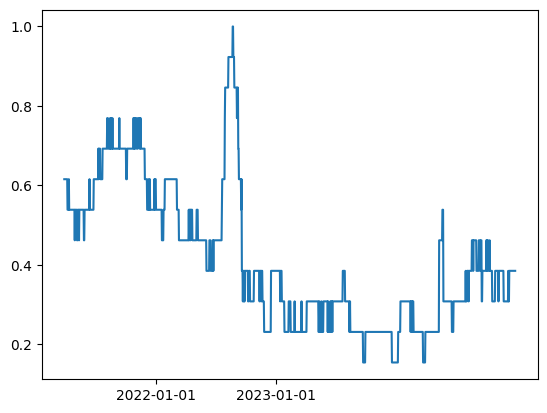

In [6]:
plt.plot(langs["val_noexp", "cpp"])
plt.xticks(['2022-01-01', '2023-01-01'])

In [7]:
def derivative(column, window):
    colmns = langs[column].columns

    langs1 = langs[column].copy()
    langs2 = langs[column].copy()

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    labels_val = OrderedDict()

    for c in colmns:
        langs1[c] = langs1[c].rolling(window=window).mean()
        langs2[c] = langs2[c].rolling(window=window).mean()
        langs2[c] = langs2[c].shift(window)
        labels_val[c] = (langs1[c] - langs2[c])[-1]

    labels = [k for k, v in sorted(labels_val.items(), key=lambda item: item[1], reverse=True)]

    for i, l in enumerate(labels):   
        if i < 10:
            ax.plot(langs1[l] - langs2[l])
        else:
            ax.plot(langs1[l] - langs2[l], linestyle='--')

    ax.legend(labels, loc='upper left')
    ax.axhline(y=0, color='k')
    plt.xticks('')
    #colmns = langs1.iloc[0].sort_values(ascending=False).index

C:\Users\ksn\AppData\Local\Temp\ipykernel_14080\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


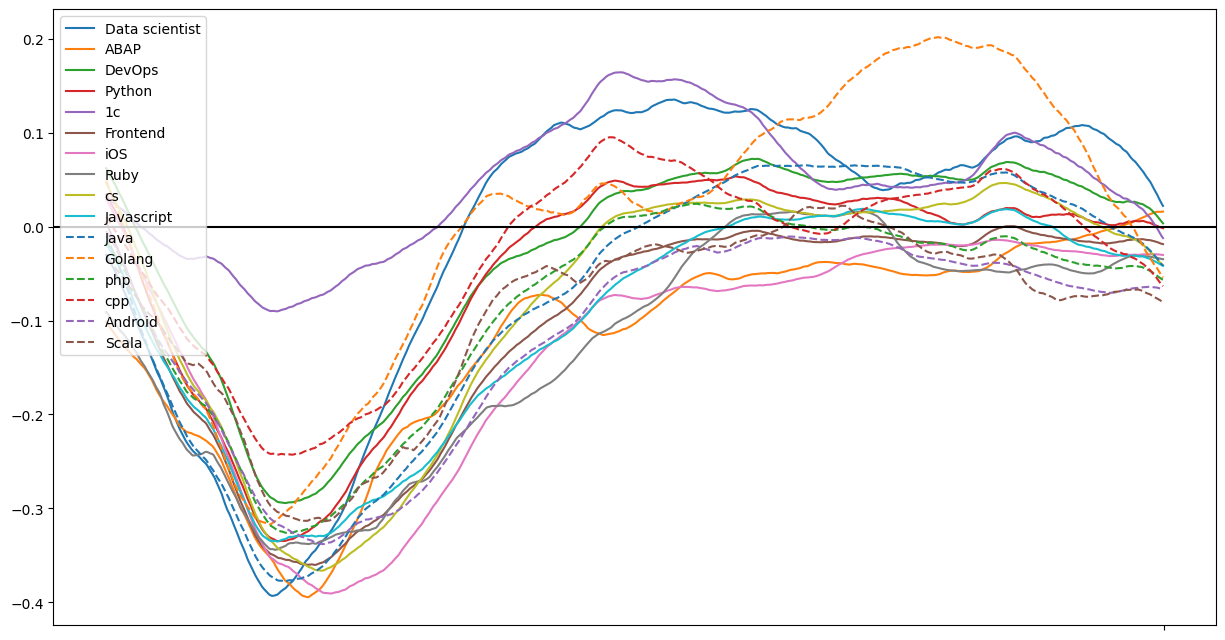

In [8]:
derivative('val', 200)

C:\Users\ksn\AppData\Local\Temp\ipykernel_14080\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


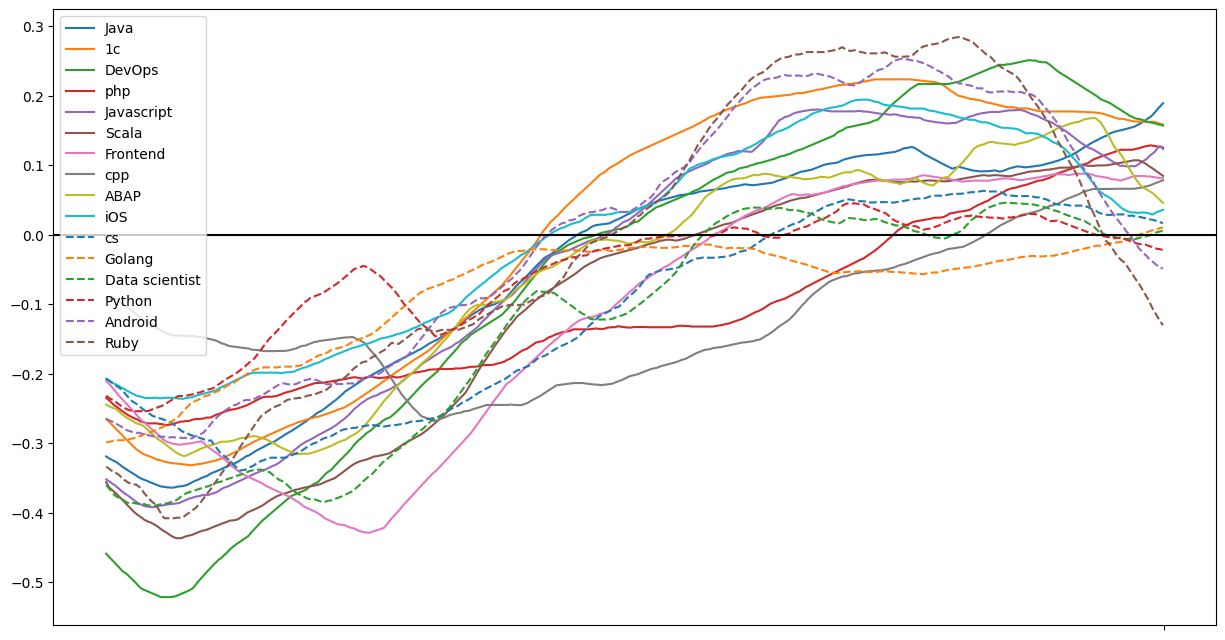

In [9]:
derivative('val_noexp', 300)

C:\Users\ksn\AppData\Local\Temp\ipykernel_14080\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


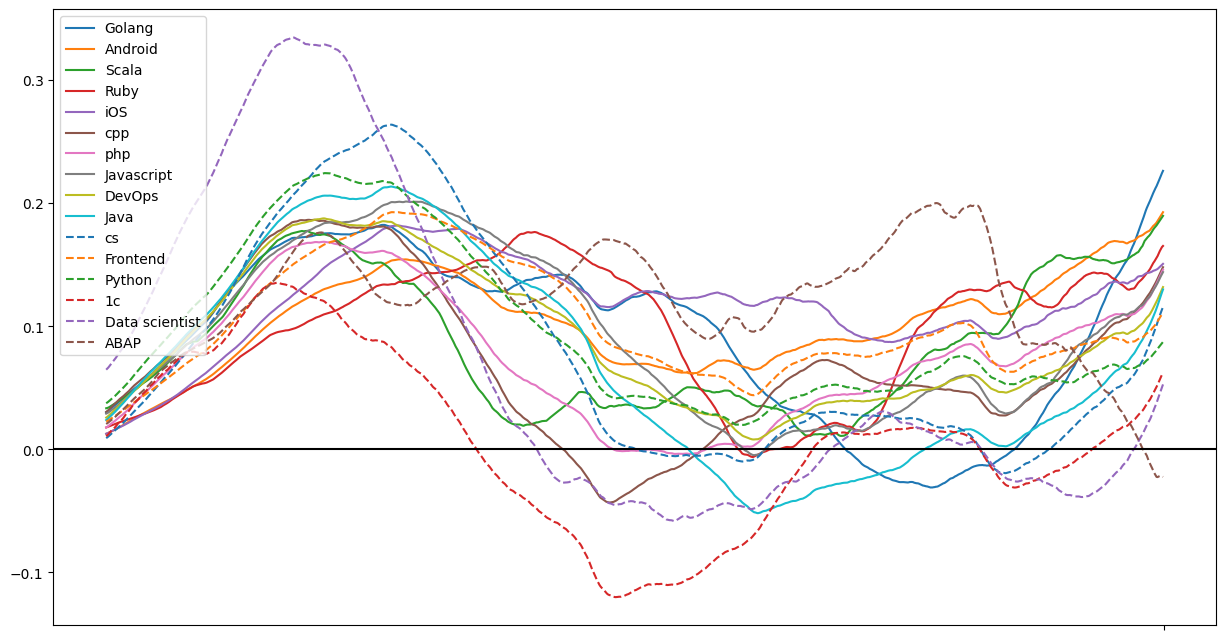

In [10]:
derivative('res_vac', 200)

C:\Users\ksn\AppData\Local\Temp\ipykernel_14080\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


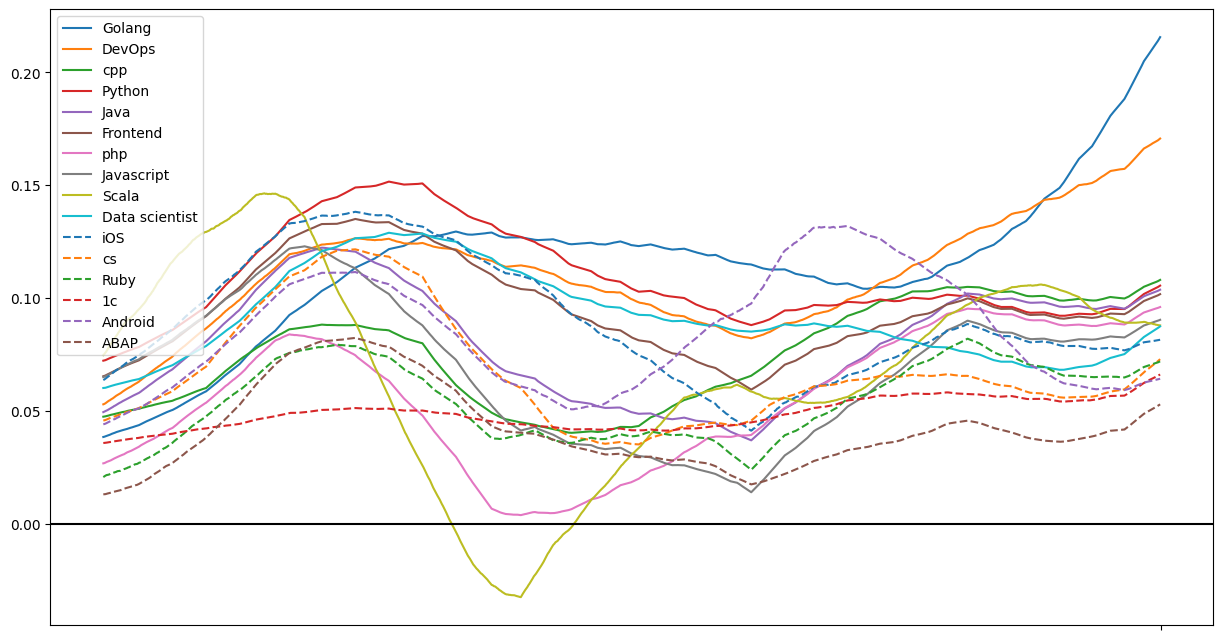

In [11]:
derivative('res', 200)

In [12]:
import seaborn as sns

def corr_matrix(colmns):
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1.0)
    sns.heatmap(pd.DataFrame(langs[colmns]).corr(),cmap='GnBu',annot=True)

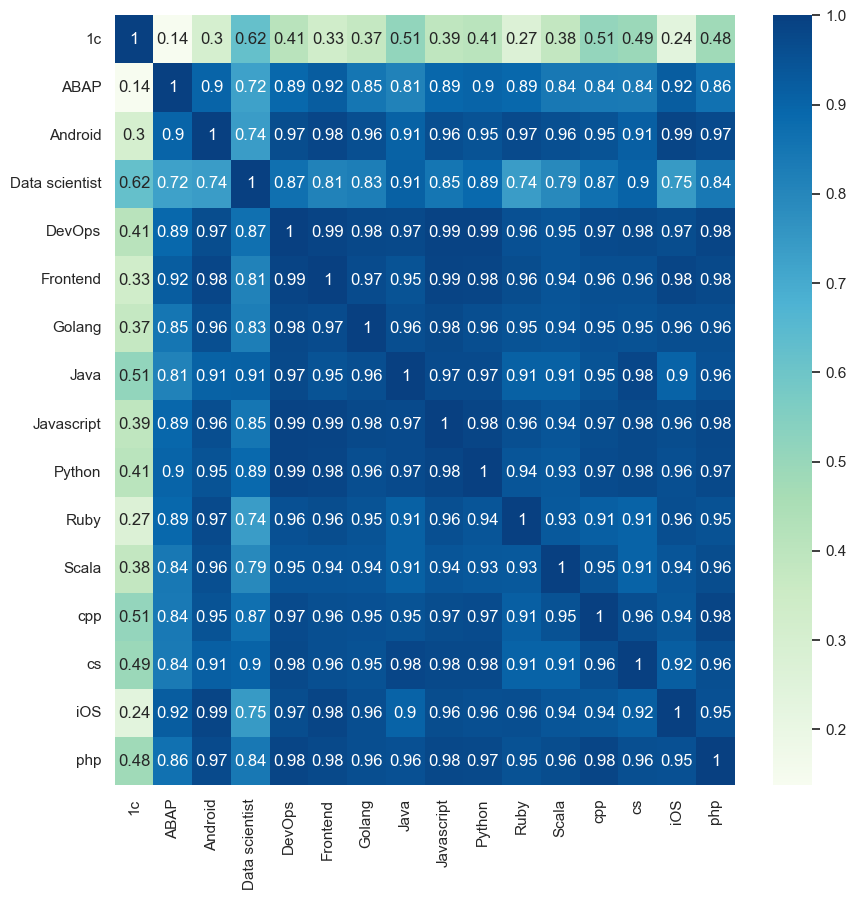

In [13]:
corr_matrix('res_vac')

In [14]:
langs.index = pd.to_datetime(langs.index)

def year(x):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 4)
    plt.plot(langs[x].groupby(langs.index.strftime('%m-%d')).median().median(axis=1))
    plt.xticks([str(i).zfill(2) + "-01" for i in range(1, 13)])
    plt.grid()

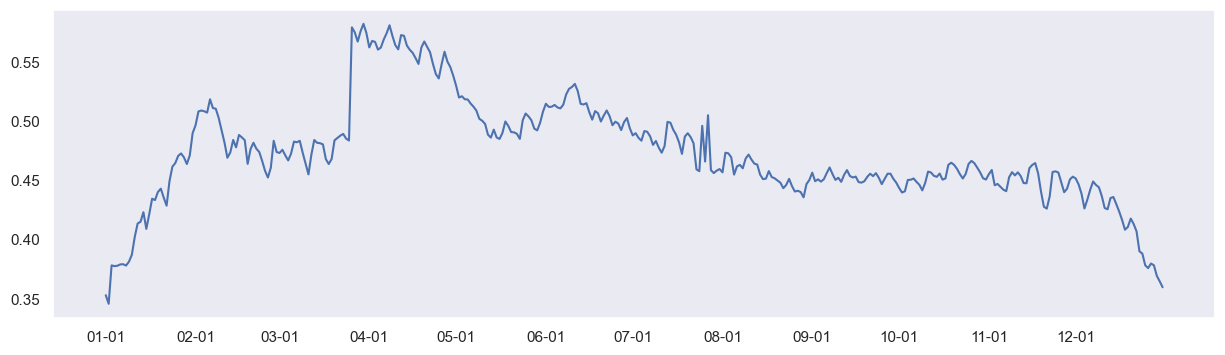

In [15]:
year("val")

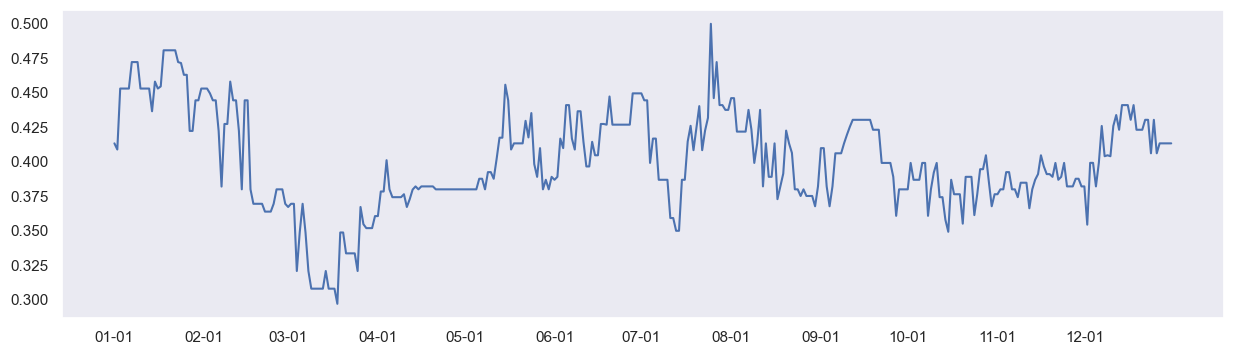

In [16]:
year("val_noexp")

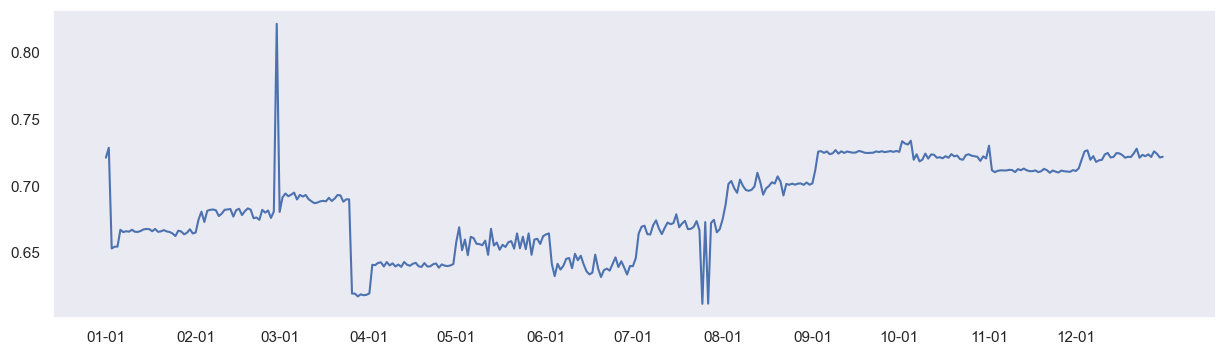

In [17]:
year("res")

In [18]:
def normalize(column, window):
    langs1 = langs[column].copy()
    colmns = langs1.iloc[0].sort_values(ascending=False).index

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    labels = []

    for i, c in enumerate(colmns):
        langs1[c] = langs1[c].rolling(window=window).mean()

        if i < 10:
            ax.plot(langs1[c])
            labels.append(langs1[c].name)
        else:
            ax.plot(langs1[c], linestyle='--')
            labels.append(langs1[c].name)

    ax.legend(labels)

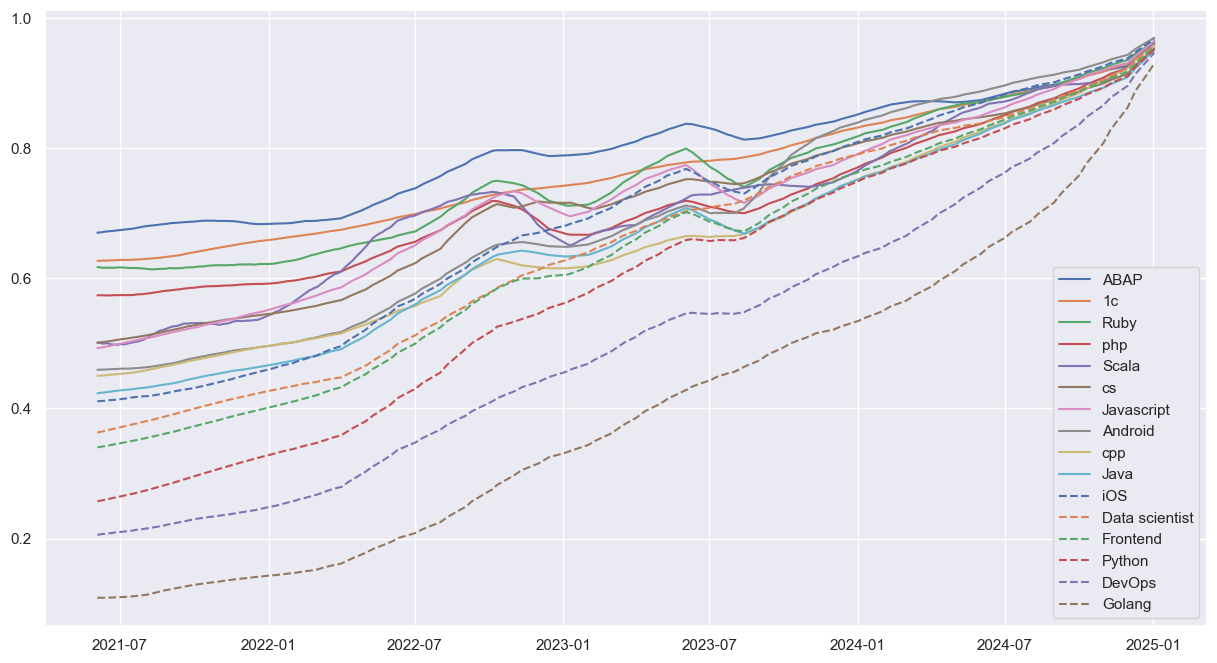

In [19]:
normalize("res", 70)

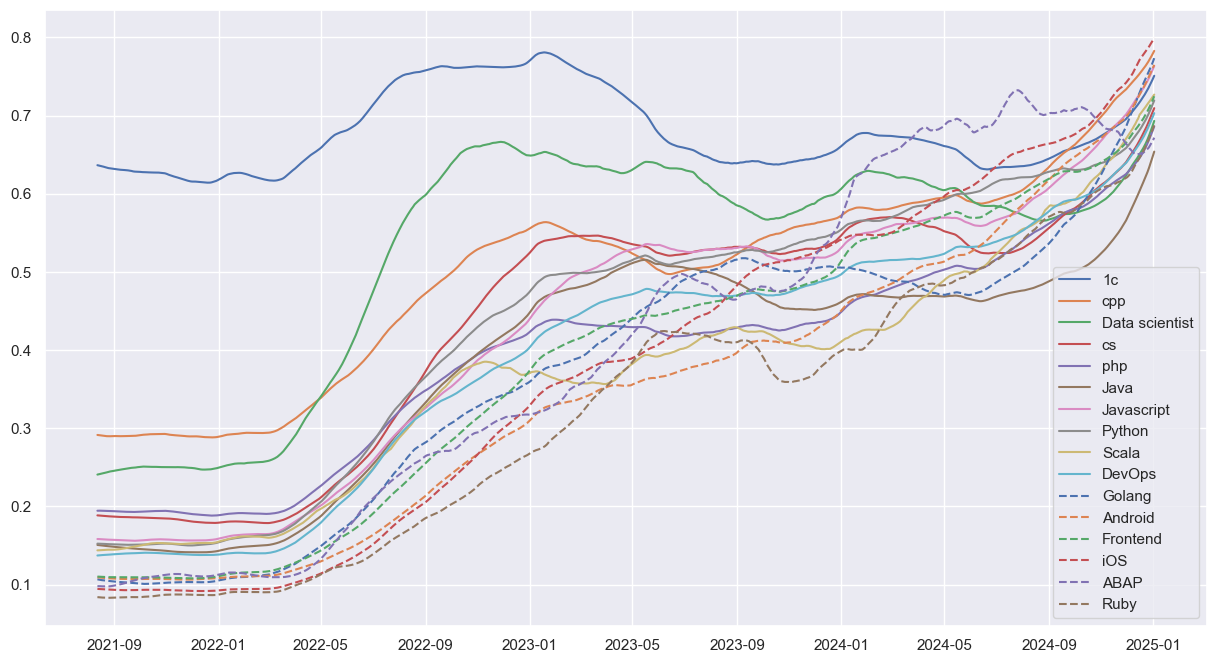

In [20]:
normalize("res_vac", 140)